In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw/news.csv', parse_dates=['scraping_date', 'publication_date'])
df['year'] = df['publication_date'].dt.year
df = df[df['publication_date'] <= '2020-12-31']
categories = list(df['category'].value_counts().index[:5])
df = df[df['category'].isin(categories)]
df = pd.DataFrame(df.groupby(by = ['category','year']).count()['news_id'])
df = df.reset_index()

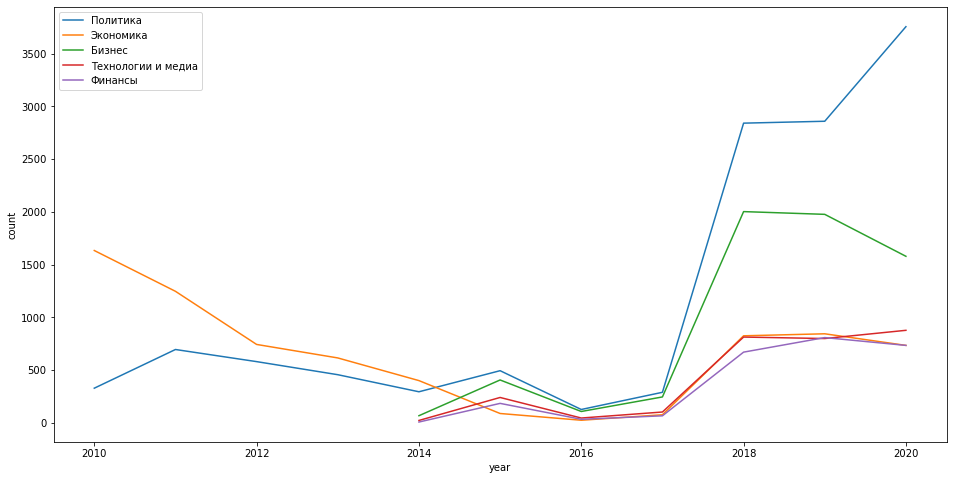

In [3]:
fig, ax = plt.subplots(figsize = (16,8))

for category in categories:
    t = df[df['category'] == category]
    x = t['year'].tolist()
    y = t['news_id'].tolist()    
    
    ax.plot(x, y, label=category)

ax.set_xlabel('year')

ax.set_ylabel('count')

ax.legend()
plt.show()